# Customer Churn Prediction

## Importing Libraires

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.13.0


In [2]:
!pip install ipython-autotime
%load_ext autotime

time: 0 ns (started: 2024-09-27 22:19:42 +05:30)


In [3]:
import matplotlib.pyplot as plt
import keras
import re
import os
from keras.models import load_model
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

time: 4.33 s (started: 2024-09-27 22:20:25 +05:30)


In [6]:
df = pd.read_csv("Churn_Modelling.csv")

time: 62 ms (started: 2024-09-27 22:23:59 +05:30)


In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


time: 63 ms (started: 2024-09-27 22:24:05 +05:30)


In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

time: 31 ms (started: 2024-09-27 22:24:45 +05:30)


In [9]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

time: 15 ms (started: 2024-09-27 22:25:58 +05:30)


In [10]:
df.duplicated().sum()

0

time: 31 ms (started: 2024-09-27 22:26:13 +05:30)


## EDA (Exploratory Data Analysis)

0    7963
1    2037
Name: Exited, dtype: int64

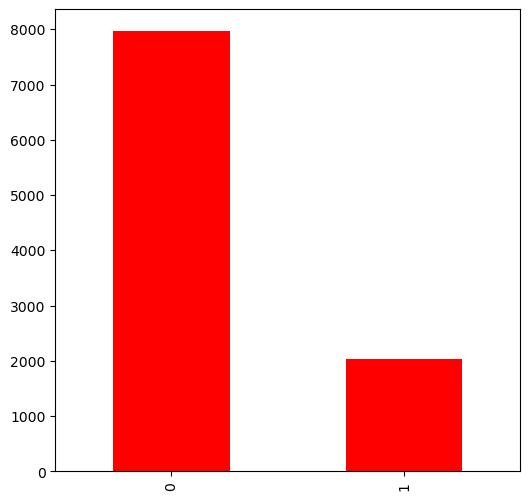

time: 282 ms (started: 2024-09-27 22:28:46 +05:30)


In [19]:
count = df['Exited']
count.value_counts().plot(kind="bar",figsize=(6,6),color='red')
count.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

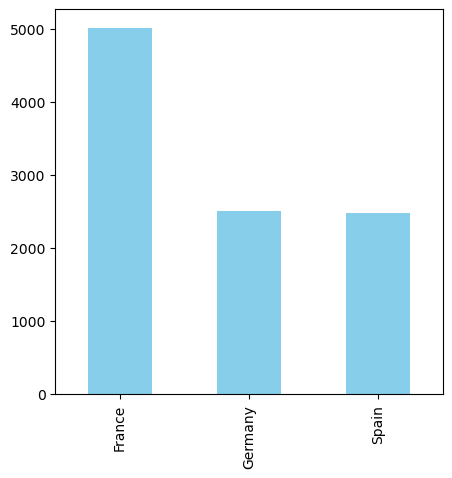

time: 250 ms (started: 2024-09-27 22:28:39 +05:30)


In [18]:
df['Geography'].value_counts().plot(kind="bar",figsize=(5,5),color='skyblue')
df['Geography'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

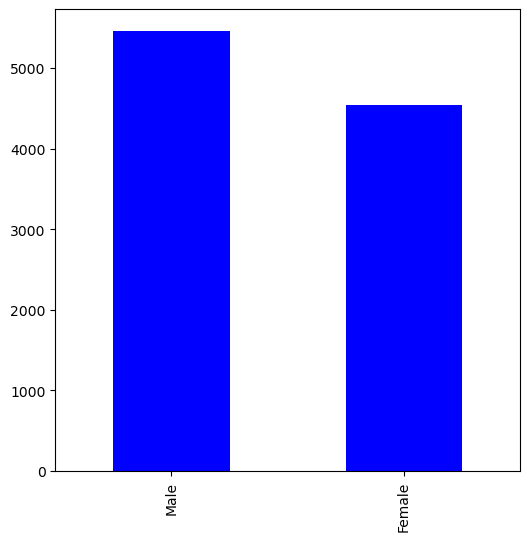

time: 250 ms (started: 2024-09-27 22:28:30 +05:30)


In [17]:
df['Gender'].value_counts().plot(kind="bar",figsize=(6,6),color='blue')
df['Gender'].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

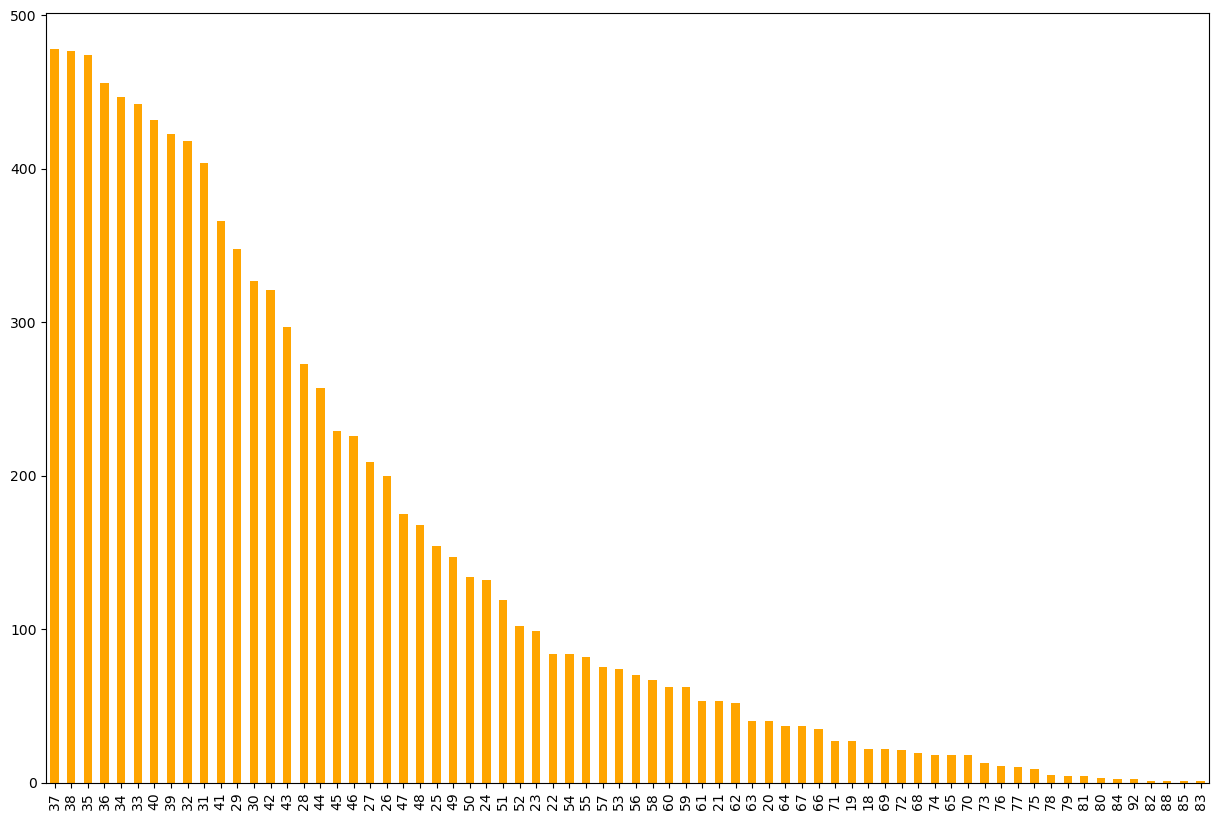

time: 1.08 s (started: 2024-09-27 22:29:56 +05:30)


In [25]:
df['Age'].value_counts().plot(kind="bar",figsize=(15,10),color='orange')
df['Age'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

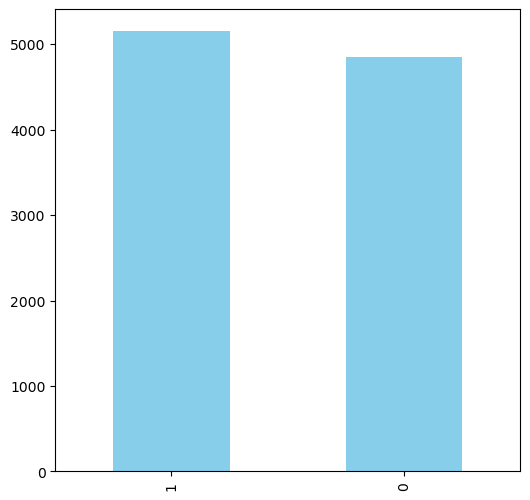

time: 235 ms (started: 2024-09-27 22:30:19 +05:30)


In [28]:
df['IsActiveMember'].value_counts().plot(kind="bar",figsize=(6,6),color='skyblue')
df['IsActiveMember'].value_counts()

### Droping unnecessary columns

In [29]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace= True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


time: 47 ms (started: 2024-09-27 22:31:29 +05:30)


In [30]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

time: 0 ns (started: 2024-09-27 22:31:41 +05:30)


### coverting all datatypes into float

In [32]:
label_encoder = LabelEncoder()
columns_to_convert_in_string_to_int = ['Geography','Gender']
for col in columns_to_convert_in_string_to_int:
    df[col] = label_encoder.fit_transform(df[col])
    
columns_to_convert_in_int_to_float = ['CreditScore','Geography','Gender', 'Age','Tenure','NumOfProducts','HasCrCard','IsActiveMember']
for col in columns_to_convert_in_int_to_float:
    df[col] = df[col].astype('float64')

time: 15 ms (started: 2024-09-27 22:32:46 +05:30)


In [33]:
df.dtypes

CreditScore        float64
Geography          float64
Gender             float64
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

time: 0 ns (started: 2024-09-27 22:32:54 +05:30)


In [34]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,0.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1
1,608.0,2.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,502.0,0.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
3,699.0,0.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0
4,850.0,2.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0


time: 32 ms (started: 2024-09-27 22:33:04 +05:30)


In [37]:
X = df.drop(columns=['Exited'])
y = df['Exited']

time: 0 ns (started: 2024-09-27 22:33:32 +05:30)


In [38]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619.0,0.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,608.0,2.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,502.0,0.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,699.0,0.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,850.0,2.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771.0,0.0,1.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64
9996,516.0,0.0,1.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77
9997,709.0,0.0,0.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58
9998,772.0,1.0,1.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52


time: 47 ms (started: 2024-09-27 22:33:33 +05:30)


In [39]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

time: 16 ms (started: 2024-09-27 22:33:36 +05:30)


In [40]:
scaler = StandardScaler()
X= scaler.fit_transform(X)

time: 63 ms (started: 2024-09-27 22:33:45 +05:30)


In [41]:
X

array([[-0.32622142, -0.90188624, -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  1.51506738, -1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.90188624, -1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.30659057,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

time: 16 ms (started: 2024-09-27 22:33:51 +05:30)


### Train Test Split

In [42]:
X_train, X_test , Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

time: 16 ms (started: 2024-09-27 22:34:27 +05:30)


In [43]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((8000, 10), (2000, 10), (8000,), (2000,))

time: 0 ns (started: 2024-09-27 22:34:39 +05:30)


# Model Training

### Tensorflow model

In [44]:
model = Sequential([
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

time: 187 ms (started: 2024-09-27 22:35:58 +05:30)


In [45]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

time: 31 ms (started: 2024-09-27 22:36:08 +05:30)


In [46]:
history = model.fit(X_train, Y_train, epochs=15, batch_size=64, validation_split=0.2)

Epoch 1/15
100/100 [==============================] - 2s 8ms/step - loss: 0.6534 - accuracy: 0.6202 - val_loss: 0.4997 - val_accuracy: 0.7987
Epoch 2/15
100/100 [==============================] - 0s 4ms/step - loss: 0.4800 - accuracy: 0.7934 - val_loss: 0.4556 - val_accuracy: 0.7987
Epoch 3/15
100/100 [==============================] - 0s 4ms/step - loss: 0.4544 - accuracy: 0.7936 - val_loss: 0.4403 - val_accuracy: 0.8000
Epoch 4/15
100/100 [==============================] - 0s 4ms/step - loss: 0.4424 - accuracy: 0.7987 - val_loss: 0.4317 - val_accuracy: 0.8138
Epoch 5/15
100/100 [==============================] - 0s 4ms/step - loss: 0.4338 - accuracy: 0.8100 - val_loss: 0.4241 - val_accuracy: 0.8206
Epoch 6/15
100/100 [==============================] - 0s 4ms/step - loss: 0.4250 - accuracy: 0.8206 - val_loss: 0.4160 - val_accuracy: 0.8275
Epoch 7/15
100/100 [==============================] - 0s 4ms/step - loss: 0.4163 - accuracy: 0.8303 - val_loss: 0.4062 - val_accuracy: 0.8356
Epoch 

### Logistic Regression

In [47]:
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)

LogisticRegression()

time: 109 ms (started: 2024-09-27 22:36:57 +05:30)


### Gradient Boosting

In [48]:
gb=GradientBoostingClassifier(random_state=42)
gb.fit(X_train,Y_train)

GradientBoostingClassifier(random_state=42)

time: 3.33 s (started: 2024-09-27 22:38:00 +05:30)


### Random Forest

In [49]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

time: 3.62 s (started: 2024-09-27 22:38:29 +05:30)


# Models evaluation and predection

### Tensorflow

In [51]:
# Evaluate
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'\n Accuracy: {accuracy}')

# Predict
y_pred_tf = (model.predict(X_test) > 0.5).astype("int32")

63/63 [==============================] - 0s 3ms/step - loss: 0.3498 - accuracy: 0.8585

 Accuracy: 0.8585000038146973
63/63 [==============================] - 0s 3ms/step
time: 1.11 s (started: 2024-09-27 22:39:39 +05:30)


### Logistic Regression

In [52]:
# Predict
y_pred_log_reg = log_reg.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, y_pred_log_reg)}")
print(classification_report(Y_test, y_pred_log_reg))

Accuracy: 0.815
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

time: 16 ms (started: 2024-09-27 22:40:17 +05:30)


### Gradient Boosting

In [53]:
# Predict
y_pred_gb = gb.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, y_pred_gb)}")
print(classification_report(Y_test, y_pred_gb))

Accuracy: 0.8655
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

time: 63 ms (started: 2024-09-27 22:40:44 +05:30)


### Random Forest

In [54]:
# Predict
y_pred_forest = random_forest.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, y_pred_forest)}")
print(classification_report(Y_test, y_pred_forest))

Accuracy: 0.864
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

time: 125 ms (started: 2024-09-27 22:41:09 +05:30)
